In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy.io as sio

In [3]:
from bicme.tests.case_normal import CaseNormal
from bicme.samplers import MWGSampler
from bicme.samplers import RosenthalAdaptiveSampler
from bicme.proposals import RWMHProposal
from bicme.display import quick_display
from bicme.display import DisplayResults

In [4]:
mat1 = sio.loadmat('../../Tests/Data/NormData.mat')
data = np.array(mat1['data']).flatten()
np.random.seed(1)
cn = CaseNormal(data)

##### Run: sampler- Metropolis_within_Gibbs sampler with scaling during burn-in; proposal-  random-walk Metropoli-Hastings.

In [5]:
X0 = [2, 10]
N = 10000 # samples required
M = 1000 # notify every #
lag = 50 # adjustment lag
# Initialise Proposer
proposer = RWMHProposal(cn.logPosterior, verbose=True)
# Initialise Sampler
sampler = MWGSampler(samples_draw=N, notify_every=M, 
                     burnin_fraction=0.5, burnin_lag=lag,
                     model=cn.logPosterior, 
                     proposal=proposer.propose_block,
                     verbose=True)  
sampler.acceptance_limits = [0.3, 0.7]
sampler.scale = 0.5
# Sample
np.random.seed(1)
S = sampler.sample_block(X0)

Sampler initialised...
Iteration 50; Acceptance: 0.400000; Scale factor 1.000000: not changed
Iteration 100; Acceptance: 0.380000; Scale factor 1.000000: not changed
Iteration 150; Acceptance: 0.220000; Scale factor 0.500000: decreased
Iteration 200; Acceptance: 0.440000; Scale factor 0.500000: not changed
Iteration 250; Acceptance: 0.300000; Scale factor 0.500000: not changed
Iteration 300; Acceptance: 0.420000; Scale factor 0.500000: not changed
Iteration 350; Acceptance: 0.280000; Scale factor 0.250000: decreased
Iteration 400; Acceptance: 0.500000; Scale factor 0.250000: not changed
Iteration 450; Acceptance: 0.600000; Scale factor 0.250000: not changed
Iteration 500; Acceptance: 0.660000; Scale factor 0.250000: not changed
Iteration 550; Acceptance: 0.420000; Scale factor 0.250000: not changed
Iteration 600; Acceptance: 0.440000; Scale factor 0.250000: not changed
Iteration 650; Acceptance: 0.520000; Scale factor 0.250000: not changed
Iteration 700; Acceptance: 0.500000; Scale fac

In [6]:
print('max posterior = ', max(S.posteriors))
imax = np.where(S.posteriors == S.posteriors.max())[0][0]
print('imax=', imax)
print('MEP pars=', S.samples[:, imax])

max posterior =  -1118.18420559
imax= 4067
MEP pars= [-0.25576396  9.77513729]


In [12]:
#quick_display(S, burnin=N//2)

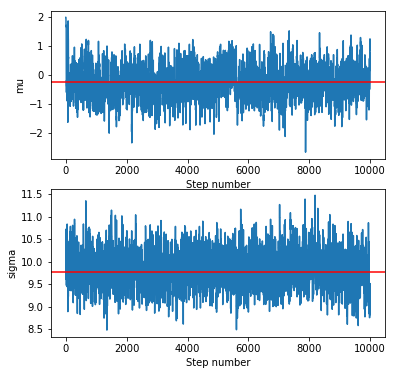

In [8]:
display = DisplayResults(S, burnin=S.N//2, names=['mu', 'sigma'])
#display.normalised = True
#display.show_labels = False
display.chains()

In [13]:
#display.distributions()

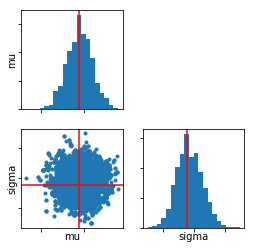

In [10]:
display.corner()

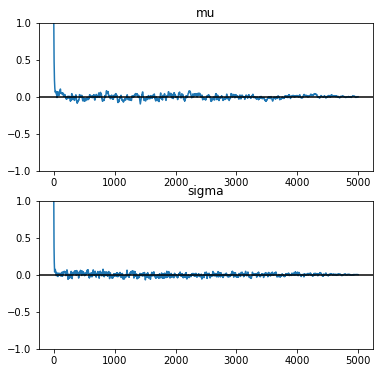

In [14]:
display.autocorrelations()